In [1]:
%load_ext autoreload

In [4]:
%autoreload 2
from commons import *

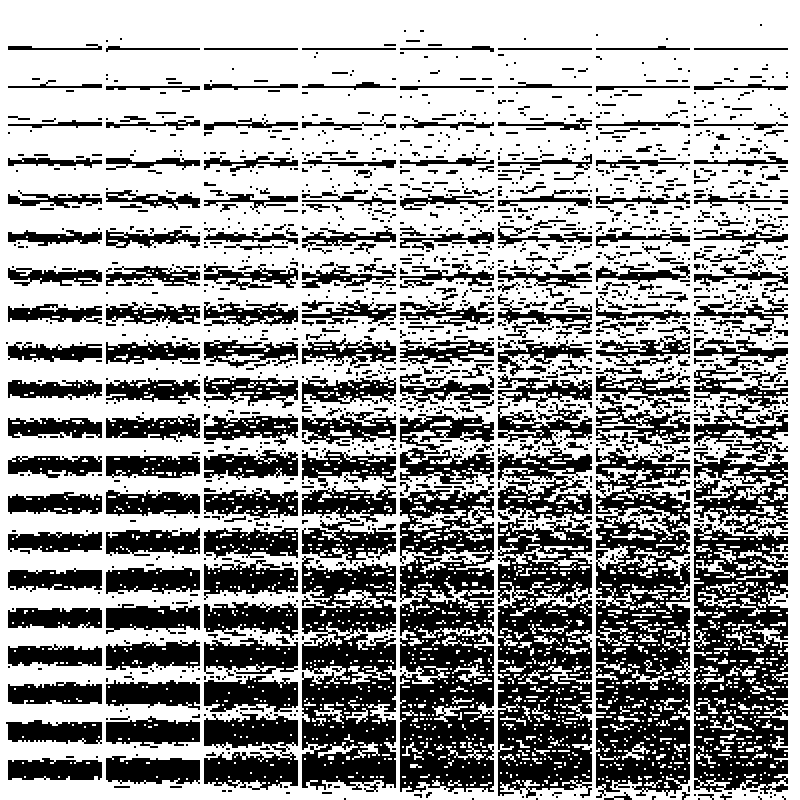

In [5]:
import matplotlib.pyplot as plt

upscaling = 2
img_width = 400
img_height = 400

image = Image.new("RGB", (img_width*upscaling, img_height*upscaling), "white")
d = Drawing(image, scaling=upscaling)

cols = 8
rows = 20

x_margin = 3 #px
y_margin = 10 #px
col_pix = ((img_width - x_margin) // cols) - x_margin
row_pix = ((img_height - y_margin) // rows) - y_margin
x_offset = ((img_width-col_pix)%(col_pix+x_margin)) // 2
y_offset = ((img_height-row_pix)%(row_pix+y_margin)) // 2

for i in range(cols):
  x1 = (x_offset + i * (col_pix + x_margin))/img_width
  x2 = (x_offset + i * (col_pix + x_margin) + col_pix)/img_width
  for j in range(rows):
    y = (y_offset + 2*y_margin + j * (row_pix + y_margin)) / img_height
    # print((x1,y), (x2,y))
    d.line((x1,y), (x2,y), NoisyBrush(spread=(x1+0.25) * 8,mean_length=30,sd_length=3, num=int(22*y)), steps=100)

image

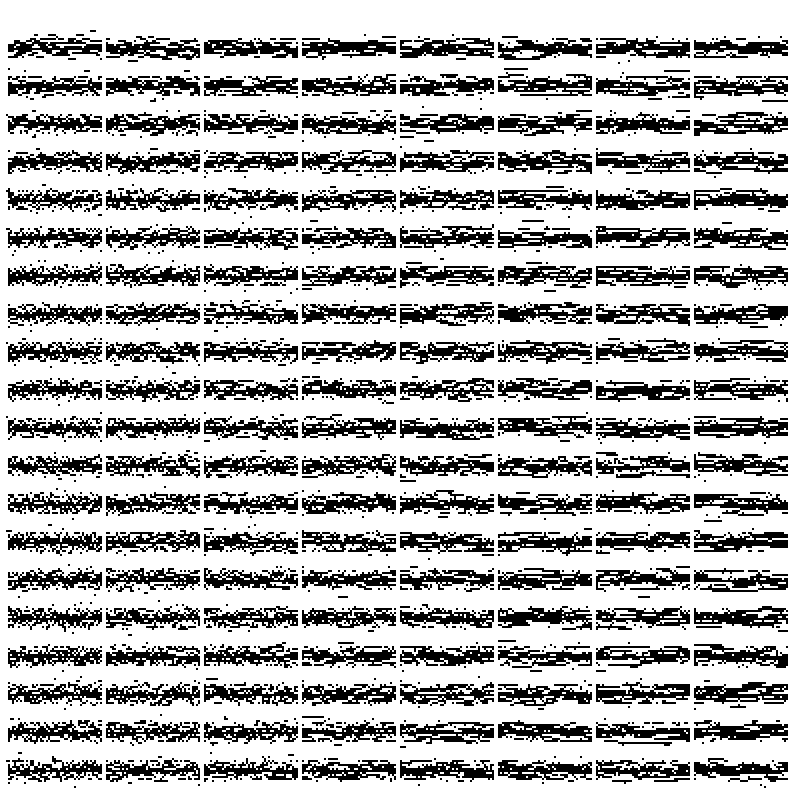

In [6]:
upscaling = 2
img_width = 400
img_height = 400

image = Image.new("RGB", (img_width*upscaling, img_height*upscaling), "white")
d = Drawing(image, scaling=upscaling)

cols = 8
rows = 20
x_margin = 3 #px
y_margin = 10 #px
col_pix = ((img_width - x_margin) // cols) - x_margin
row_pix = ((img_height - y_margin) // rows) - y_margin
x_offset = ((img_width-col_pix)%(col_pix+x_margin)) // 2
y_offset = ((img_height-row_pix)%(row_pix+y_margin)) // 2

for i in range(cols):
  x1 = (x_offset + i * (col_pix + x_margin))/img_width
  x2 = (x_offset + i * (col_pix + x_margin) + col_pix)/img_width
  for j in range(rows):
    y = (y_offset + 2*y_margin + j * (row_pix + y_margin)) / img_height
    # print((x1,y), (x2,y))
    d.line((x1,y), (x2,y), NoisyBrush(spread=3,mean_length=5,sd_length=(i+1), num=7, spread_factor=(j+1)/3), steps=(x2-x1))

image

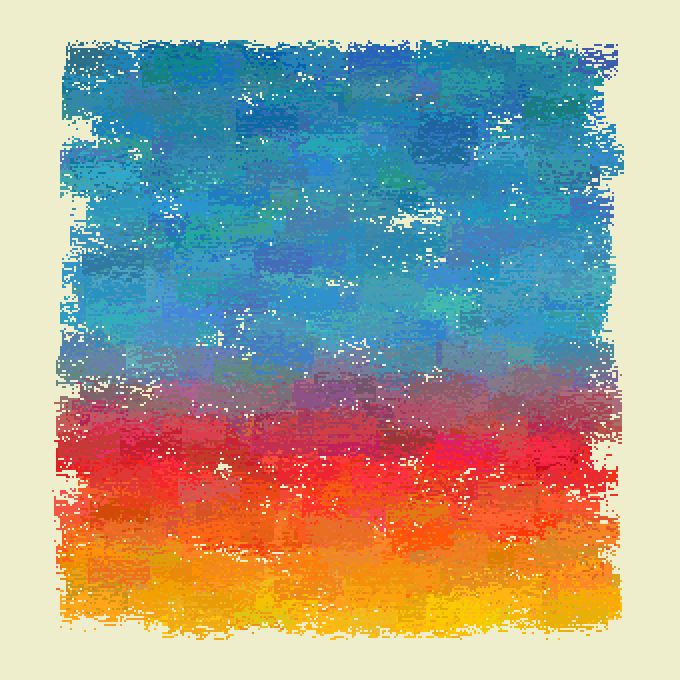

In [7]:
upscaling = 2
img_width = 300
img_height = 300

margin = 20 #px
num = 1000

image = Image.new("RGB", ((img_width + margin * 2) * upscaling, (img_height + margin * 2)*upscaling), "#eec")
d = Drawing(image, scaling=upscaling, span=((margin, img_width+margin), (margin, img_height+margin)))

stroke_width =.1
xs = random.uniform(stroke_width/4, 1-stroke_width*5/4, num)
ys = random.uniform(stroke_width/4, 1-stroke_width/4, num)
color_noise = random.normal(0, 15, (num, 3))

color0 = hexcode("#237aa1")
color50 = hexcode("#439ac1")
color70 = hexcode("#e62532")
color100 = hexcode("#fbcc0a")
gradient = Gradient((0, color0), (0.5, color50), (0.7, color70), (1, color100))
for i in range(num):
  x, y = xs[i], ys[i]
  # print(y, gradient.getColor(y))
  color = tuple((gradient.getColor(y) + color_noise[i]).astype(int))
  brush = NoisyBrush(spread=5,mean_length=5,sd_length=3, num=10, color=color)
  d.line((x,y), (x+stroke_width,y), brush, steps=stroke_width)
image

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

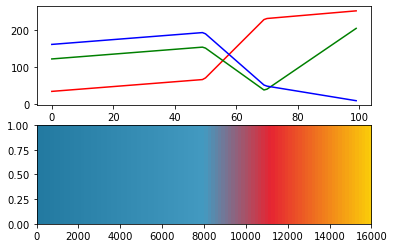

In [15]:
# mapping a gradient

color0 = hexcode("#237aa1")
color50 = hexcode("#439ac1")
color70 = hexcode("#e62532")
color100 = hexcode("#fbcc0a")
gradient = Gradient((0, color0), (0.5, color50), (0.7, color70), (1, color100))

gradient.plot()